In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
path = "./data/scope_260.csv"
df = pd.read_csv(path, names=["time", "RFsignal", "PickUpsignal", "sync2"], skiprows=2, skipfooter=1, engine="python")

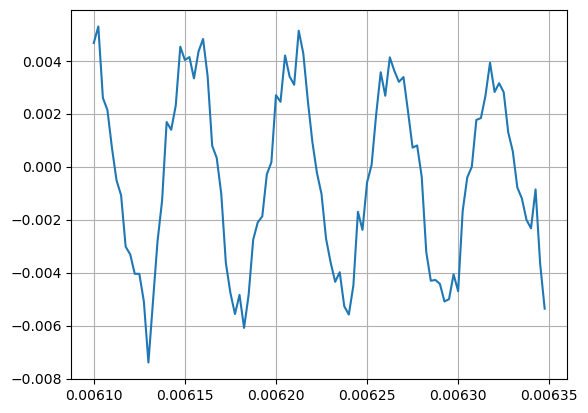

In [6]:
plt.plot(df.time[2000:2100], df.PickUpsignal[2000:2100])
plt.grid()
#plt.xlim(0.001, 0.004)

In [9]:
-0.00025*np.log(0.8)

5.578588782855243e-05

In [77]:
def FIDfunc(x, a, gamma, omega, phi):
    return a*np.exp(-gamma*x)*np.sin(2*np.pi*omega*x+phi)

In [140]:
x_min = 2000
x_max = 2500

In [141]:
par, cov = curve_fit(FIDfunc, df.time[x_min:x_max], df.PickUpsignal[x_min:x_max], p0 = (0.004, 5.57*10**(-5), 18150, 0))
#par, cov = curve_fit(FIDfunc, df.time[x_min:x_max], df.PickUpsignal[x_min:x_max], p0 = (5.66317603e-03, 2.96588718e+01, 1.81332711e+04, 3.94230400e+00, 0.004, 50, 0))
x = np.linspace(df.time[x_min], df.time[x_max], 100000)
y = FIDfunc(x, par[0], par[1], par[2], par[3])
#y = FIDfunc(x, par[0], par[1], par[2], par[3], par[4], par[5], par[6])

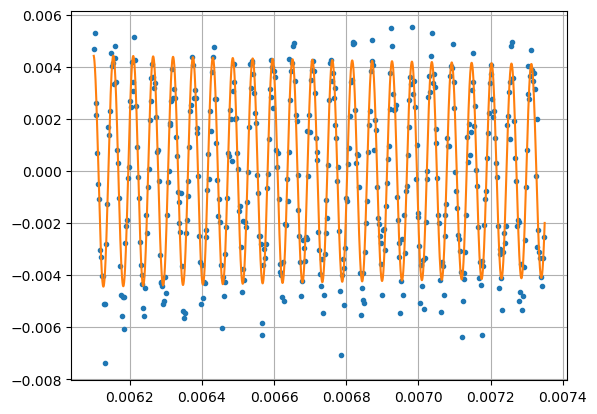

In [142]:
plt.plot(df.time[x_min:x_max], df.PickUpsignal[x_min:x_max], ".")
plt.plot(x, y)
plt.grid()

In [143]:
par

array([-6.61436292e-03,  6.50124722e+01,  1.81216540e+04,  1.41380037e+00])

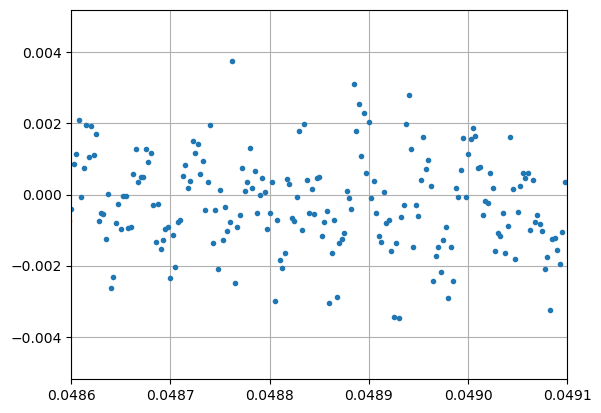

In [102]:
x_min = 19000
x_max = 19200
plt.plot(df.time[x_min:x_max], df.PickUpsignal[x_min:x_max], ".")
plt.plot(x, y)
plt.xlim(df.time[x_min], df.time[x_max])
plt.grid()

In [3]:
import ROOT
import Config as conf

In [4]:
df = pd.read_table(conf.DataName, sep=" ", names = ["time", "signal"])
Time = np.array(df.time, dtype="d")
V_mean = np.array(df.signal, dtype="d")

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


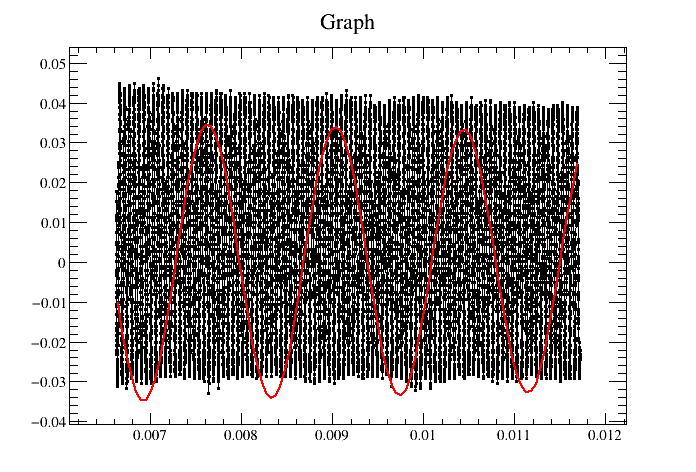

In [6]:
x_min = 2000
x_max = 19000
gr = ROOT.TGraph(len(df.time[x_min:x_max]), np.array(df.time[x_min:x_max]), np.array(df.signal[x_min:x_max]))
gr_fit = ROOT.TF1("f", "[0]*expo(-[1]*x)*sin(2*pi*[2]*x+[3])", df.time[x_min], df.time[x_max])
#gr_fit.SetParameters(-6.61436292e-03,  6.50124722e+01,  1.81216540e+04,  1.41380037e+00)
gr_fit.SetParameters(0.01415861885725226, 13.324007257585418, 18117.27312027492, 0.)
gr.Fit(gr_fit, "QR")
par = [gr_fit.GetParameter(k) for k in range(gr_fit.GetNpar())]
gr.Draw("APL")
gr.SetMarkerStyle(7)
gr.SetMarkerSize(10)
gr_fit.Draw("same")
c1 = ROOT.gROOT.FindObject("c1")
c1.Draw("same")

In [154]:
par

[0.01801104042108599,
 15.095979149955784,
 18104.1835867572,
 -38.721495771101026]